In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import io
import requests
import time
import seaborn as sns
import string


In [3]:
##This function is modified to retrived most historical stock data from NASDAQ and NYSX
##This function cannot retrieve historical index data since Google Finance does not support downding this type of data
##This function return dataframe
month_exe = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
def google_stocks(symbol, startdate, enddate = None):
    
    startdate = month_exe[startdate[0]] + '%20' + str(startdate[1]) + '%2C%20' + str(startdate[2])

    enddate = month_exe[enddate[0]] + '%20' + str(enddate[1]) + '%2C%20' + str(enddate[2])
    
    stock_url = 'https://finance.google.com/finance/historical?q=' + symbol + \
                '&startdate=' + startdate + '&enddate=' + enddate + '&output=csv'
 
    raw_response = requests.get(stock_url).content
 
    stock_data = pd.read_csv(io.StringIO(raw_response.decode('utf-8')))
 
    return stock_data

In [4]:
#https://finance.google.com/finance/historical?q=AAPL&startdate=Jul%201%2C%202016&enddate=Jul%201%2C%202017&output=csv

## Retrieve Stock Historical Data

In [5]:
startdate = (7,1,2016)
enddate   = (7,1,2017)

In [6]:
Symbol = ['NASDAQ:GOOG','NYSE:UVV','NYSE:BP','NYSE:CLD','NYSE:BHP','NYSE:RIO']

In [7]:
for i in Symbol:
    symbol = i
    df_name = symbol.split(':')[1] + '_hist'
    exec('{} = google_stocks(symbol, startdate, enddate)'.format(df_name))


In [8]:
BP_hist.iloc[0:10]

,Date,Open,High,Low,Close,Volume
0,30-Jun-17,34.76,34.82,34.47,34.65,4807251
1,29-Jun-17,35.27,35.30,34.81,34.86,3545048
2,28-Jun-17,35.25,35.44,35.18,35.27,4845269
3,27-Jun-17,35.12,35.39,35.04,35.15,4930949
4,26-Jun-17,35.04,35.09,34.86,34.88,3762404
5,23-Jun-17,34.59,34.91,34.54,34.84,3501179
6,22-Jun-17,34.64,34.80,34.51,34.60,4961404
7,21-Jun-17,34.76,34.98,34.51,34.65,7100841
8,20-Jun-17,35.31,35.31,34.78,34.98,8766518
9,19-Jun-17,36.00,36.26,35.97,36.04,6064749


In [9]:
BP_hist.Date = pd.to_datetime(BP_hist.Date)

In [10]:
BP_hist.Low.iloc[0:10]

0    34.47
1    34.81
2    35.18
3    35.04
4    34.86
5    34.54
6    34.51
7    34.51
8    34.78
9    35.97
Name: Low, dtype: float64

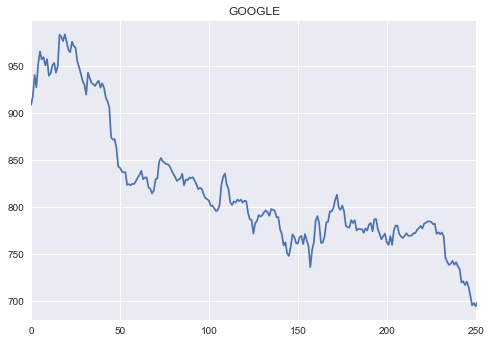

In [21]:
goog = sns.tsplot(GOOG_hist.Close)
plt.title('GOOGLE')

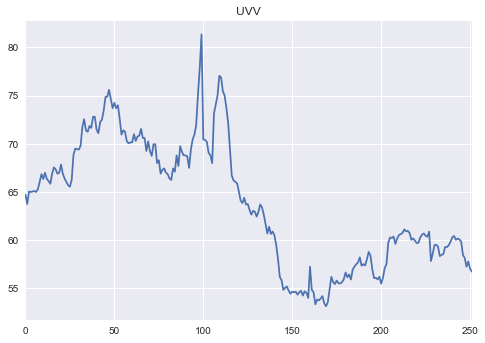

In [20]:
uvv = sns.tsplot(UVV_hist.Close)
plt.title('UVV')

In [13]:
for i in ['CLD','BHP','RIO']:
    exec('{}_hist["company"] = i'.format(i))



In [14]:
coal_mining = CLD_hist.append(BHP_hist).append(RIO_hist)

In [15]:
coal_mining.head()

,Date,Open,High,Low,Close,Volume,company
0,30-Jun-17,3.66,3.66,3.50,3.53,929278,CLD
1,29-Jun-17,3.66,3.78,3.58,3.63,1157099,CLD
2,28-Jun-17,3.56,3.71,3.55,3.64,1463069,CLD
3,27-Jun-17,3.57,3.75,3.49,3.52,1248118,CLD
4,26-Jun-17,3.27,3.60,3.17,3.53,1752988,CLD


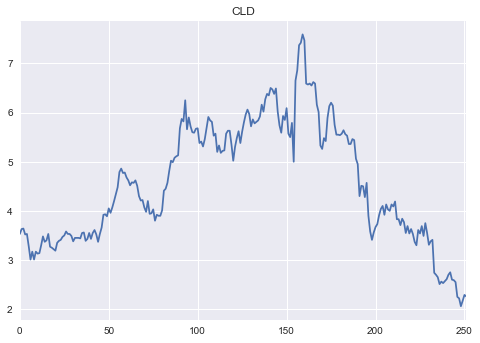

In [17]:
cld = sns.tsplot(CLD_hist.Close)
plt.title('CLD')

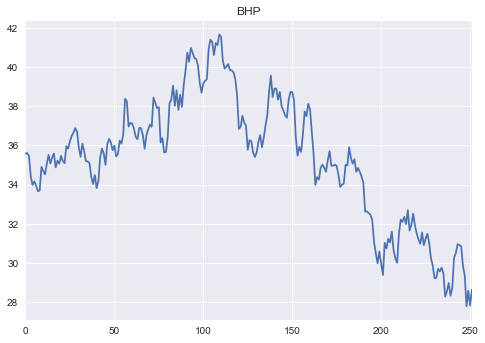

In [18]:
bhp = sns.tsplot(BHP_hist.Close)
plt.title('BHP')

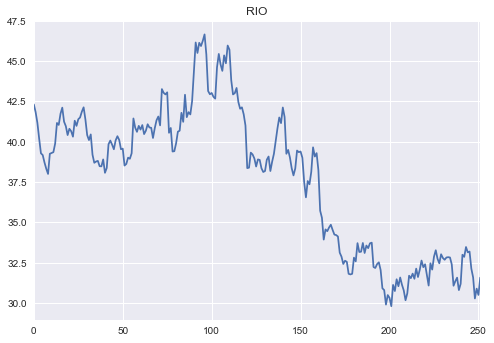

In [19]:
rio = sns.tsplot(RIO_hist.Close)
plt.title('RIO')

In [1]:
#https://finance.google.com/finance/historical?q=INDEXSP:.INX&startdate=Jul+1%2C+2016&enddate=Jul+1%2C+2017&output=csv